In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import UnitaryGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from math import sin, asin, floor, sqrt, pi
import numpy as np
from scipy.linalg import sqrtm, fractional_matrix_power




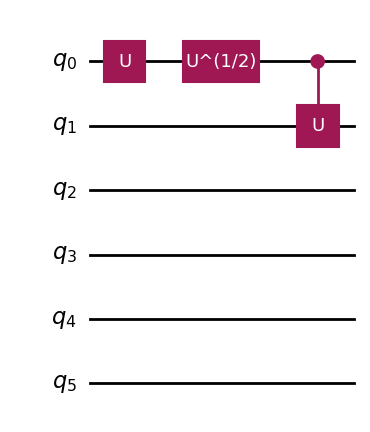

In [3]:
U = np.array([
    [1, 0],
    [0, -1]
])

U_sqrt = sqrtm(U)

u_gate = UnitaryGate(U, label="U")
u_sqrt_gate = UnitaryGate(U_sqrt, label="U^(1/2)")
cu_gate = u_gate.control(1)

# Custom color style
style = {
    "displaycolor": {"U": ("#168A2F", "#000000")}  # (gate fill color, text color)
}


qc = QuantumCircuit(6, name="circuit")
qc.append(u_gate, [0])
qc.append(u_sqrt_gate, [0])
qc.append(cu_gate, [0, 1])
qc.draw(output="mpl")

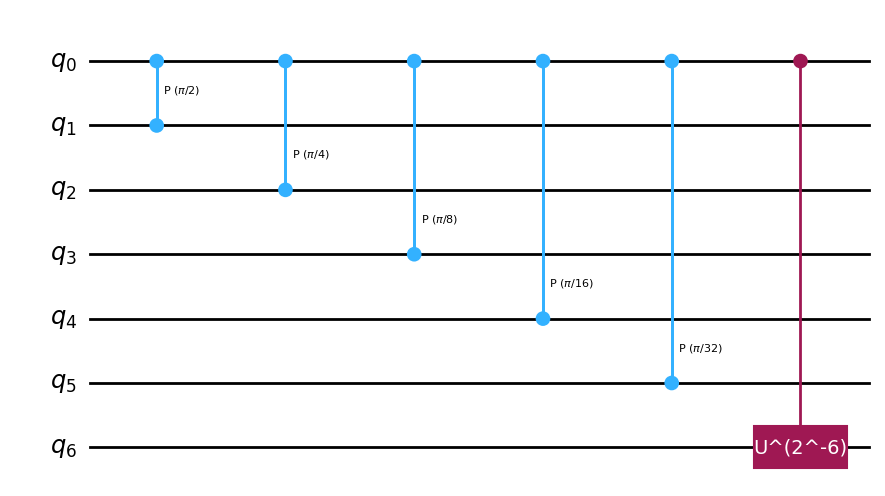

In [42]:
def c_phase_sqrt_u(m: int, U):
    
    ans = QuantumCircuit(m + 2)
    
    for j in range(m):
        ans.cp(pi/(2**(j + 1)), 0, j + 1)

    cu_gate = UnitaryGate(U, label=f"U^(2^-{m + 1})").control(1)
    ans.append(cu_gate, [0, m + 1])


    return ans

U = np.array([
    [1, 0],
    [0, -1]
])
c_phase_sqrt_u(5, U).draw(output="mpl", style=style)